<a href="https://colab.research.google.com/github/HUUQUY1004/Deep-Learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(f"Tensorflow: {tf.__version__}")
import matplotlib.pyplot as plt
import numpy as np
import random

Tensorflow: 2.15.0


In [ ]:
## Load data
(X_train, y_train), (X_test, y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
type(X_train) , type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
y_train[0]

9

In [ ]:
class_names = ["T-shirt/top", 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_nums = len(class_names)

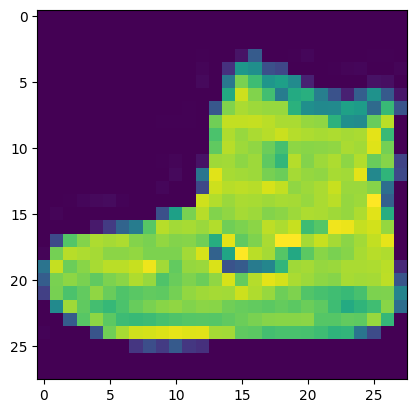

In [ ]:
# class_names[y_train[1]]
plt.imshow(X_train[0])

IndexError: index 2 is out of bounds for axis 0 with size 2

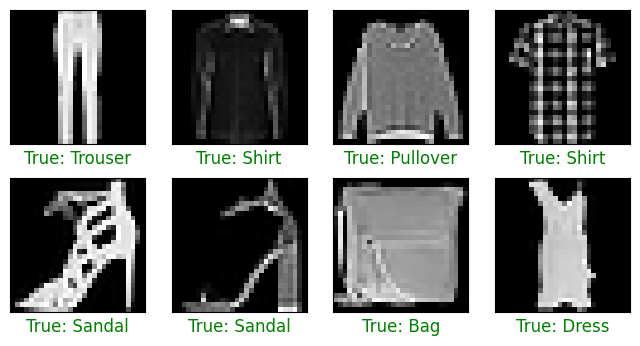

In [ ]:
def plot_data(x_data : np.ndarray, y_data : np.ndarray)-> None:
  nrows, ncols = 2,4
  fig, axes = plt.subplots(nrows, ncols , figsize = (8,4))

  len_x = x_data.shape[0]
  for idx in range(0, len_x):
    ax = axes[idx // ncols, idx % ncols]

    img_idx = random.randint(0, len_x)

    ax.imshow(x_data[img_idx], cmap = 'gray')

    # ẩn số tên trục tọa độ
    ax.set(xticks = [], yticks = [])

    true_lable_str = f"True: {class_names[y_data[img_idx]]}"
    ax.set_xlabel(true_lable_str, color = "green", fontsize= 12)

plot_data(X_train, y_train)

In [ ]:
# Image pre-processing

# khi chấm shape: sẽ có 4 values : (1,2,3,4):
# + số bức ảnh
# height, width , chanels: 1 khi ảnh là gray , 3 khi ảnh là ảnh màu

# Convert unit8 from dataset to float32
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) /255
X_test.dtype, X_test.shape




(dtype('float32'), (10000, 28, 28))

In [ ]:
# Make sure images have shape (1000,28,28) -> (1000,28,28,1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# Convert class vector to binary class matrices: 1 => [0,1,0,0,0....]
# 1         => aprarse_categorical_crossentropy
# [0,1,0,0,0....] => categorical_crossentropy

y_train_label=keras.utils.to_categorical(y_train , class_nums)
y_test_label=keras.utils.to_categorical(y_test , class_nums)

In [ ]:
y_train[0], y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

In [ ]:
# input shape
input_shape = [28,28,1]

In [ ]:
from os import access
# ANN

model = keras.models.Sequential([
    # chuyển thàng one-d-arr
    layers.Flatten(input_shape=input_shape), # (28*28*1)
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation= 'relu'),
    # output layer
    layers.Dense(class_nums, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size  = 128
history=model.fit(X_train, y_train_label,epochs= epochs, batch_size= batch_size, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 7s 15ms/step - loss: 0.5605 - accuracy: 0.7972 - val_loss: 0.3914 - val_accuracy: 0.8568
Epoch 2/10
422/422 [==============================] - 5s 12ms/step - loss: 0.3843 - accuracy: 0.8574 - val_loss: 0.3491 - val_accuracy: 0.8717
Epoch 3/10
422/422 [==============================] - 6s 14ms/step - loss: 0.3381 - accuracy: 0.8731 - val_loss: 0.3521 - val_accuracy: 0.8735
Epoch 4/10
422/422 [==============================] - 6s 13ms/step - loss: 0.3112 - accuracy: 0.8845 - val_loss: 0.3370 - val_accuracy: 0.8823
Epoch 5/10
422/422 [==============================] - 5s 12ms/step - loss: 0.2894 - accuracy: 0.8907 - val_loss: 0.3182 - val_accuracy: 0.8835
Epoch 6/10
422/422 [==============================] - 6s 14ms/step - loss: 0.2730 - accuracy: 0.8978 - val_loss: 0.3217 - val_accuracy: 0.8843
Epoch 7/10
422/422 [==============================] - 5s 12ms/step - loss: 0.2610 - accuracy: 0.9025 - val_loss: 0.3087 - val_accuracy: 0.8878

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_loss , val_loss = history_dict['loss'], history_dict['val_loss']
train_acc , val_acc = history_dict['accuracy'], history_dict['val_accuracy']

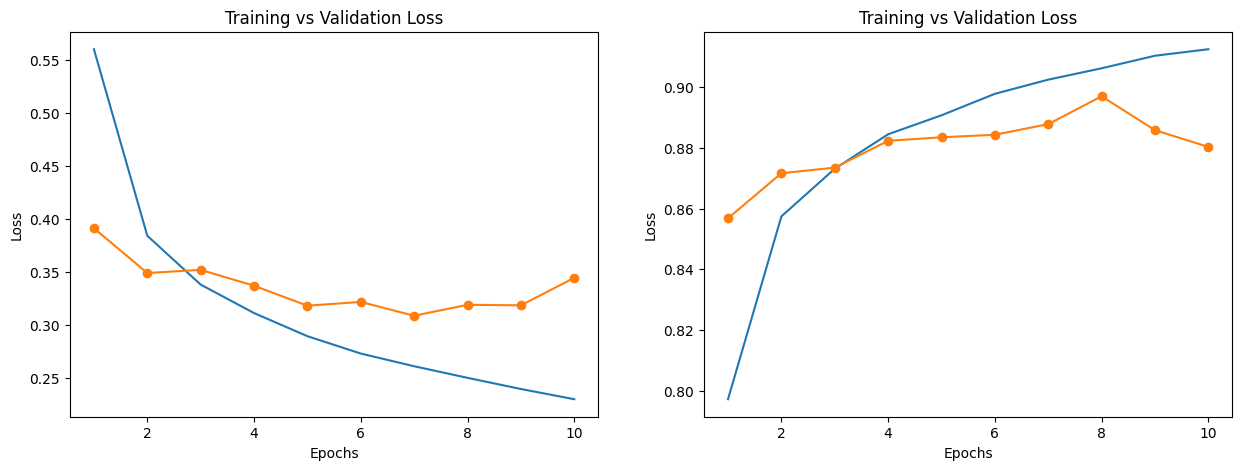

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,5))
epoch_runs = [i + 1 for i in range(epochs)]
ax1.plot(epoch_runs , train_loss, label = 'Train loss')
ax1.plot(epoch_runs , val_loss, label = 'Validation loss', marker = 'o')
ax1.set(title = 'Training vs Validation Loss', xlabel = 'Epochs', ylabel='Loss')

ax2.plot(epoch_runs , train_acc, label = 'Train Accuracy')
ax2.plot(epoch_runs , val_acc, label = 'Validation Accuracy', marker = 'o')
ax2.set(title = 'Training vs Validation Loss', xlabel = 'Epochs', ylabel='Loss')
plt.show()

# Model Evaluation

In [ ]:
score = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3711 - accuracy: 0.8804


In [ ]:
score

[0.37109002470970154, 0.8804000020027161]

In [ ]:
print(f'Test loss {score[0]:.4f}')
print(f'Test Accuracy {score[1]:.4f}')

Test loss 0.3711
Test Accuracy 0.8804


# **Prediction**

In [ ]:
X_sample = X_test[:3]
y_proba = model.predict(X_sample)

1/1 [==============================] - 0s 95ms/step


In [ ]:
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
predictions = np.argmax(y_proba, axis=1)
predictions

array([9, 2, 1])

In [ ]:
[class_names[pred] for pred in predictions]

['Ankle boot', 'Pullover', 'Trouser']

In [ ]:
pwd

'/content'